In [33]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

 Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
Logistic Regression is only applicable to binary classification problems. 
Thus, the data points are composed of two classes.

In [34]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.01,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

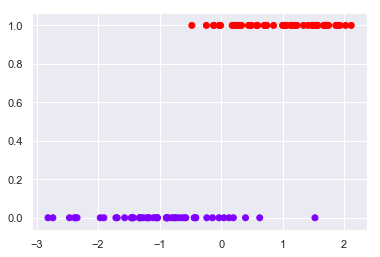

In [35]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [36]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [37]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)


//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.15028315]]
[0.05415919]


Let’s see how the model performs against data that it hasn’t been trained on.

In [39]:
y_pred = lr.predict(x_test)

In [40]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[10,  1],
       [ 0, 14]])

In [41]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.07717999, 0.92282001],
       [0.0225274 , 0.9774726 ],
       [0.00990674, 0.99009326],
       [0.05034924, 0.94965076],
       [0.82323577, 0.17676423],
       [0.35758188, 0.64241812],
       [0.16257765, 0.83742235],
       [0.76464672, 0.23535328],
       [0.07026515, 0.92973485],
       [0.82916149, 0.17083851],
       [0.02158272, 0.97841728],
       [0.86009012, 0.13990988],
       [0.06230201, 0.93769799],
       [0.9212371 , 0.0787629 ],
       [0.2662886 , 0.7337114 ],
       [0.03155903, 0.96844097],
       [0.28727242, 0.71272758],
       [0.84139983, 0.15860017],
       [0.03549165, 0.96450835],
       [0.92424275, 0.07575725],
       [0.99705627, 0.00294373],
       [0.60930277, 0.39069723],
       [0.07514484, 0.92485516],
       [0.95369051, 0.04630949],
       [0.03814029, 0.96185971]])

In [42]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

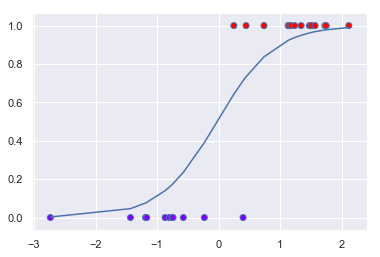

In [43]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [52]:
![title]('pic.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'pic.png''
/bin/sh: -c: line 0: `[title]('pic.png')'
